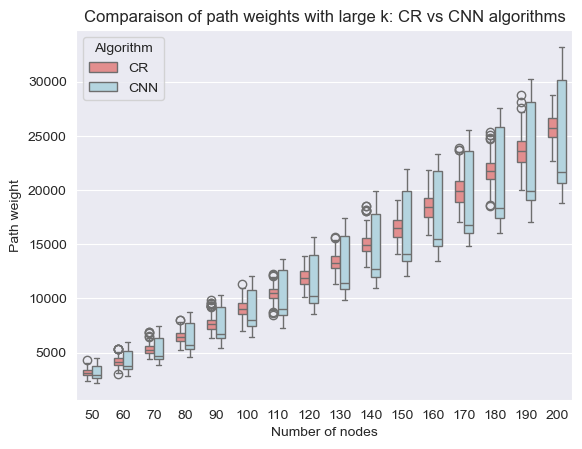

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

dataFrame = pd.read_csv('large_k50graph.csv')

plt.figure()
sns.boxplot(
    x="number of nodes",
    y="weight",
    hue="algorithm",
    data=dataFrame,
    palette={ "CR": "lightcoral", "CNN": "lightblue" },
    width=0.6
)

plt.title("Comparaison of path weights with large k: CR vs CNN algorithms")
plt.xlabel("Number of nodes")
plt.ylabel("Path weight")
plt.legend(title="Algorithm")

plt.show()

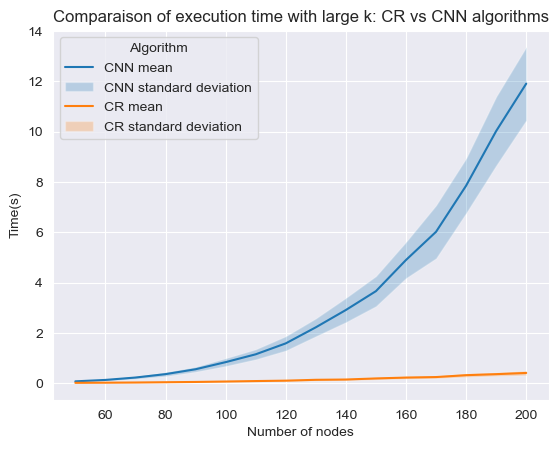

In [40]:
fig1, ax1 = plt.subplots()

stats = (dataFrame
         .groupby(['algorithm', 'number of nodes'])['run time']
         .agg(mean='mean', std=lambda x: np.std(x, ddof=1))
         .reset_index())

for algo, sub in stats.groupby('algorithm'):
    sub = sub.sort_values('number of nodes')
    
    ax1.plot(sub['number of nodes'], sub['mean'], label=f'{algo} mean')
    
    ax1.fill_between(
        sub['number of nodes'],
        sub['mean'] - sub['std'],
        sub['mean'] + sub['std'],
        alpha=0.25,
        label=f'{algo} standard deviation'
    )

ax1.set_title("Comparaison of execution time with large k: CR vs CNN algorithms")
ax1.set_xlabel("Number of nodes")
ax1.set_ylabel("Time(s)")
ax1.legend(title="Algorithm")  

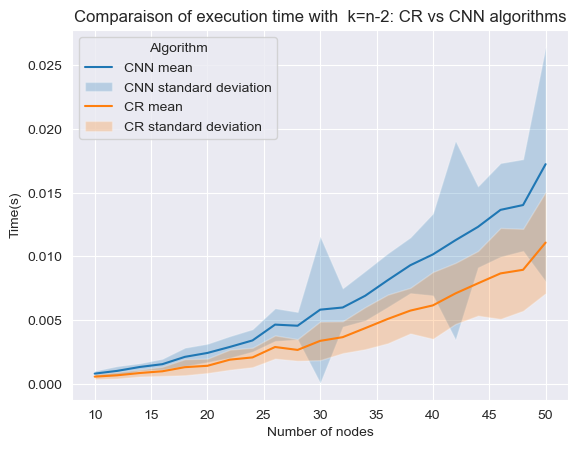

In [41]:
dataFrame = pd.read_csv('fix_k_vary_n50graph.csv')

stats = (dataFrame
         .groupby(['algorithm', 'number of nodes'])['run time']
         .agg(mean='mean', std=lambda x: np.std(x, ddof=1))
         .reset_index())

fig2, ax2 = plt.subplots()

for algo, sub in stats.groupby('algorithm'):
    sub = sub.sort_values('number of nodes')
    
    ax2.plot(sub['number of nodes'], sub['mean'], label=f'{algo} mean')
    
    ax2.fill_between(
        sub['number of nodes'],
        sub['mean'] - sub['std'],
        sub['mean'] + sub['std'],
        alpha=0.25,
        label=f'{algo} standard deviation'
    )
ax2.set_title("Comparaison of execution time with  k=n-2: CR vs CNN algorithms")
ax2.set_xlabel("Number of nodes")
ax2.set_ylabel("Time(s)")
ax2.legend(title="Algorithm")  

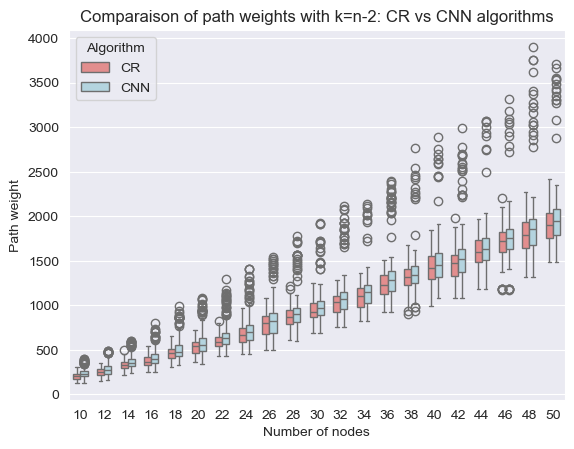

In [42]:
plt.figure()
sns.boxplot(
    x="number of nodes",
    y="weight",
    hue="algorithm",
    data=dataFrame,
    palette={ "CR": "lightcoral", "CNN": "lightblue" },
    width=0.6
)

plt.title("Comparaison of path weights with k=n-2: CR vs CNN algorithms")
plt.xlabel("Number of nodes")
plt.ylabel("Path weight")
plt.legend(title="Algorithm")

plt.show()

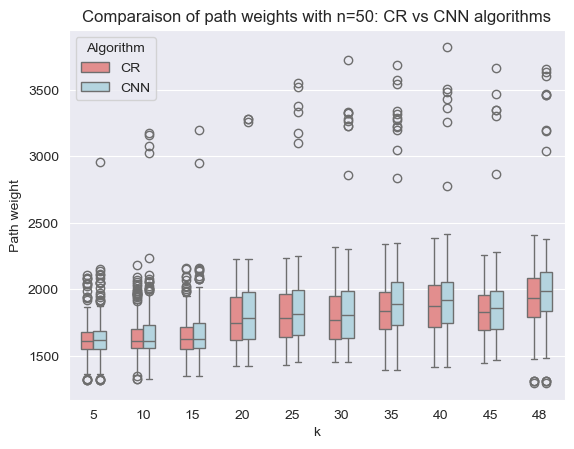

In [43]:
dataFrame = pd.read_csv('fix_n_vary_k50graph.csv')

plt.figure()
sns.boxplot(
    x="k",
    y="weight",
    hue="algorithm",
    data=dataFrame,
    palette={ "CR": "lightcoral", "CNN": "lightblue" },
    width=0.5
)

plt.title("Comparaison of path weights with n=50: CR vs CNN algorithms")
plt.xlabel("k")
plt.ylabel("Path weight")
plt.legend(title="Algorithm")

plt.show()

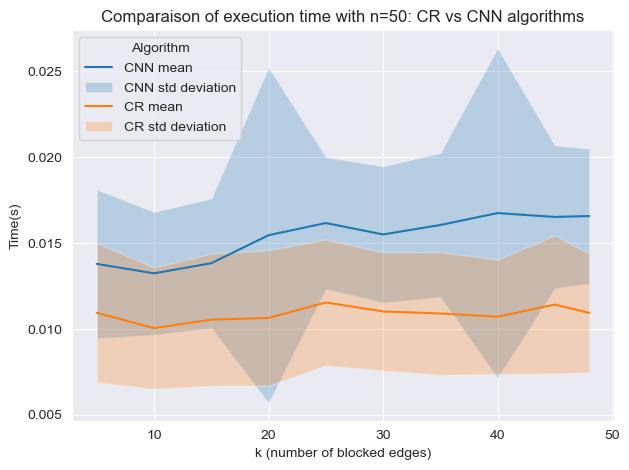

In [50]:
fig3, ax3 = plt.subplots()

stats = (dataFrame
         .groupby(['algorithm', 'k'])['run time']
         .agg(mean='mean', std=lambda x: np.std(x, ddof=1))
         .reset_index())

for algo, sub in stats.groupby('algorithm'):
    sub = sub.sort_values('k')
    
    ax3.plot(sub['k'], sub['mean'], label=f'{algo} mean')
    
    ax3.fill_between(
        sub['k'],
        sub['mean'] - sub['std'],
        sub['mean'] + sub['std'],
        alpha=0.25,
        label=f'{algo} std deviation'
    )

plt.title("Comparaison of execution time with n=50: CR vs CNN algorithms")
plt.xlabel("k (number of blocked edges)")
plt.ylabel("Time(s)")
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()